In [ ]:

#  Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [ ]:

#  Create datase
np.random.seed(42)

data = pd.DataFrame({
    "study_hours": np.random.randint(1, 10, 100),
    "attendance": np.random.randint(50, 100, 100),
    "previous_score": np.random.randint(40, 90, 100)
})

data["final_score"] = (
    0.5 * data["study_hours"] +
    0.3 * data["attendance"] +
    0.2 * data["previous_score"] +
    np.random.normal(0, 5, 100)
)

print("\nDataset (first 5 rows):")
data.head()



Dataset (first 5 rows):


,study_hours,attendance,previous_score,final_score
0,7,84,77,48.493368
1,4,86,63,39.202027
2,8,96,44,47.646910
3,5,63,73,38.689800
4,7,52,45,41.772111


In [ ]:

#  Data preprocessing

X = data[["study_hours", "attendance", "previous_score"]]
y = data["final_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


NameError: name 'data' is not defined

In [ ]:

#  Train Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


In [ ]:

#  Train Decision Tree

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


In [ ]:
# ---------------------------
#  Evaluate models
# ---------------------------
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R2:", r2_score(y_true, y_pred))

evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, dt_preds, "Decision Tree")



Linear Regression Performance:
MAE: 5.141411817651701
MSE: 39.26936303880167
R2: 0.32497879426360377

Decision Tree Performance:
MAE: 8.603672480075321
MSE: 98.9788931331411
R2: -0.7013989180107072


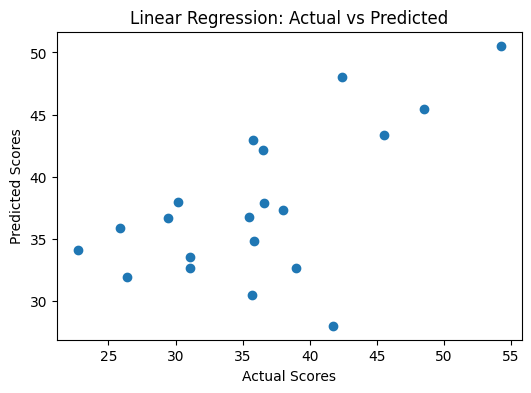

In [ ]:

#  Visualize Linear Regression results

plt.figure(figsize=(6, 4))
plt.scatter(y_test, lr_preds)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


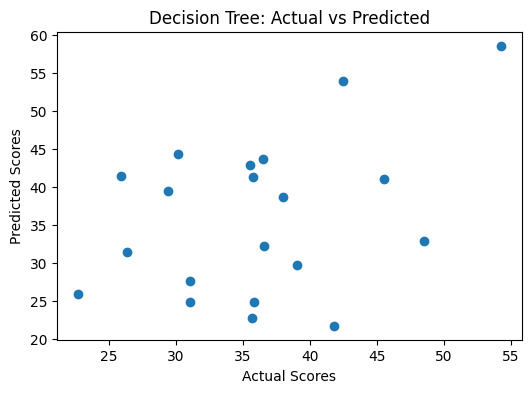

In [ ]:

# Visualize Decision Tree results

plt.figure(figsize=(6, 4))
plt.scatter(y_test, dt_preds)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()


In [ ]:

#  Select best model & save it

lr_r2 = r2_score(y_test, lr_preds)
dt_r2 = r2_score(y_test, dt_preds)

best_model = lr_model if lr_r2 > dt_r2 else dt_model
joblib.dump(best_model, "model.pkl")

print("\nBest model saved as model.pkl")



Best model saved as model.pkl


In [ ]:

# Load saved model & make predictions

import joblib
import numpy as np

# Load the saved model
loaded_model = joblib.load("model.pkl")
print("Model loaded successfully!")

# Example: Predict final score for a new student
# Format: [study_hours, attendance, previous_score]
new_student = np.array([[6, 85, 70]])  # change values as needed
predicted_score = loaded_model.predict(new_student)

print(f"Predicted final score for the student: {predicted_score[0]:.2f}")


Model loaded successfully!
Predicted final score for the student: 44.28


C:\Users\ACER\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
